In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

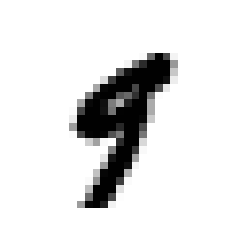

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def plot_digit(some_digit):
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation="nearest")
    plt.axis('off')
    plt.show()
    
some_digit = X[36000]
plot_digit(some_digit)

In [5]:
y[36000]

'9'

In [6]:
y=y.astype('int')

In [7]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000], y[60000:]

In [8]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
sgd_clf.predict([some_digit])

array([False])

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95795, 0.9556 , 0.9532 ])

In [13]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[52869,  1710],
       [  955,  4466]])

In [15]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.7231217616580311

In [16]:
recall_score(y_train_5, y_train_pred)

0.8238332410994281

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7701991894455463

In [18]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-4947.74885026])

In [19]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [20]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function")

In [21]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

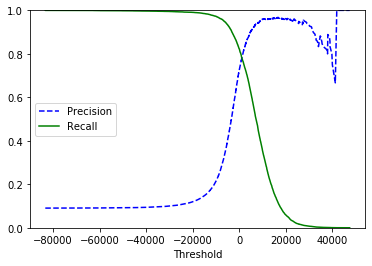

In [22]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[: -1], "b--", label="Precision")
    plt.plot(thresholds, recalls[: -1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [23]:
y_train_pred_90 = (y_scores > 2000)
y_train_pred_90

array([False,  True, False, ...,  True, False, False])

In [24]:
precision_score(y_train_5, y_train_pred_90)

0.8170536429143315

In [25]:
recall_score(y_train_5, y_train_pred_90)

0.7529976019184652

In [26]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

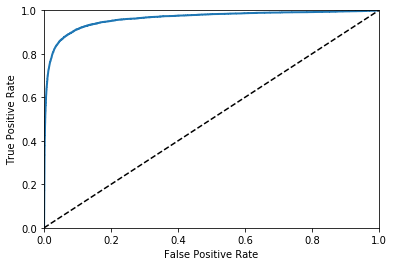

In [27]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1],"k--")
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [28]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9621139775155847

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

/home/porterg2003/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/porterg2003/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/porterg2003/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

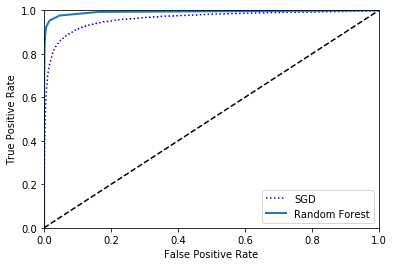

In [31]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [32]:
roc_auc_score(y_train_5, y_scores_forest)

0.9925612262939015

In [33]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([-4947.74885026])

In [34]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

/home/porterg2003/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([9])

In [35]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0.9]])

In [36]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.88817237, 0.87879394, 0.8786818 ])

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

/home/porterg2003/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.91011798, 0.90164508, 0.89613442])

In [38]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/home/porterg2003/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5590,    0,   17,   10,    9,   44,   33,    4,  215,    1],
       [   0, 6422,   42,   23,    3,   46,    4,    7,  182,   13],
       [  24,   24, 5253,   89,   68,   25,   64,   37,  362,   12],
       [  25,   22,  108, 5281,    0,  198,   25,   50,  356,   66],
       [  12,   15,   43,   11, 5249,   12,   37,   18,  277,  168],
       [  32,   17,   26,  166,   54, 4520,   77,   17,  446,   66],
       [  29,   18,   46,    2,   41,   94, 5555,    7,  126,    0],
       [  19,   14,   51,   27,   47,   12,    5, 5700,  155,  235],
       [  19,   60,   43,   92,    3,  119,   36,   10, 5417,   52],
       [  23,   24,   24,   65,  128,   36,    1,  157,  320, 5171]])

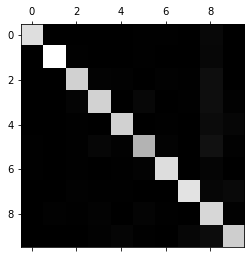

In [39]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [40]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

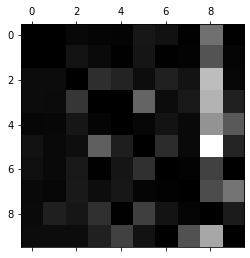

In [41]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [42]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
knn_clf.predict([some_digit])

array([[ True,  True]])

In [44]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [45]:
f1_score(y_multilabel,y_train_knn_pred, average="macro")

0.9771559944935913

In [46]:
noise = np.random.randint(0,100, (len(X_train), 784))
X_train_mod = X_train+noise
noise = np.random.randint(0,100, (len(X_test), 784))
X_test_mod = X_test +noise
y_train_mod = X_train
y_test_mod = X_test

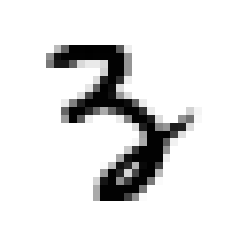

In [47]:
plot_digit(y_test_mod[87])

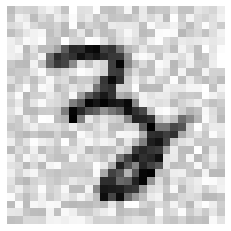

In [48]:
plot_digit(X_test_mod[87])

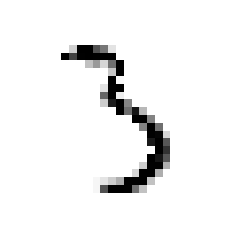

In [49]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[87]])
plot_digit(clean_digit)

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'weights': ['uniform','distance'], 'n_neighbors': [1,3,10]},
]

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, param_grid, cv=5,
                          scoring='accuracy')

grid_search.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 3, 10],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [52]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [56]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'n_neighbors': 1, 'weights': 'uniform'}
nan {'n_neighbors': 1, 'weights': 'distance'}
nan {'n_neighbors': 3, 'weights': 'uniform'}
nan {'n_neighbors': 3, 'weights': 'distance'}
nan {'n_neighbors': 10, 'weights': 'uniform'}
nan {'n_neighbors': 10, 'weights': 'distance'}


/home/porterg2003/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [141]:
from scipy.ndimage.interpolation import shift

def shiftImages(X, y):
    X_shifted = np.zeros((len(X)*5,len(X[0])))
    y_shifted = np.zeros(len(y)*5, int)
    X_shifted[:len(X)] = X
    X_shifted[len(X):len(X)*2] = shift(X, [0,1], cval=0)
    X_shifted[len(X)*2:len(X)*3] = shift(X, [0,-1], cval=0)
    X_shifted[len(X)*3:len(X)*4] = shift(X, [0,28], cval=0)
    X_shifted[len(X)*4:len(X)*5] = shift(X, [0,-28], cval=0)
    for i in range(5):
        y_shifted[len(y)*i:len(y)*(i+1)] = y
    return X_shifted, y_shifted

In [142]:
X_shifted_train, y_shifted_train = shiftImages(X_train,y_train)

In [143]:
X_shifted_test, y_shifted_test = shiftImages(X_test,y_test)

In [152]:
knn_clf.fit(X_shifted_train, y_shifted_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [155]:
y_train_knn_pred = cross_val_predict(knn_clf, X_shifted_train, y_shifted_train, cv=3)

In [156]:
f1_score(y_shifted_train,y_train_knn_pred, average="macro")

0.971967609609065

In [157]:
y_train_knn_pred

array([6, 5, 5, ..., 5, 8, 3])